In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
A=pd.read_csv("wine.csv",names = 
              ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", 
             "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", 
             "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])
A.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
1,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
2,1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
3,1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480


Relevant Information:

   -- These data are the results of a chemical analysis of
      wines grown in the same region in Italy but derived from three
      different cultivars.
      The analysis determined the quantities of 13 constituents
      found in each of the three types of wines. 

   -- I think that the initial data set had around 30 variables, but 
      for some reason I only have the 13 dimensional version. 
      I had a list of what the 30 or so variables were, but a.) 
      I lost it, and b.), I would not know which 13 variables
      are included in the set.

   -- The attributes are (dontated by Riccardo Leardi, 
	riclea@anchem.unige.it )
 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline            

5. Number of Instances

    class 1 59
	class 2 71
	class 3 48

6. Number of Attributes 
	
	13

7. For Each Attribute:

	All attributes are continuous
	
	No statistics available, but suggest to standardise
	variables for certain uses (e.g. for us with classifiers
	which are NOT scale invariant)

	NOTE: 1st attribute is class identifier (1-3)

8. Missing Attribute Values:

	None

In [9]:
A.drop(labels=0, axis=0, inplace=True)

In [13]:
A.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
1,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
2,1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
3,1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480
5,1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735


In [16]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 1 to 178
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cultivator            178 non-null    object
 1   Alchol                178 non-null    object
 2   Malic_Acid            178 non-null    object
 3   Ash                   178 non-null    object
 4   Alcalinity_of_Ash     178 non-null    object
 5   Magnesium             178 non-null    object
 6   Total_phenols         178 non-null    object
 7   Flavanoids            178 non-null    object
 8   Nonflavanoid_phenols  178 non-null    object
 9   Proanthocyanins       178 non-null    object
 10  Color_intensity       178 non-null    object
 11  Hue                   178 non-null    object
 12  OD280                 178 non-null    object
 13  Proline               178 non-null    object
dtypes: object(14)
memory usage: 19.6+ KB


In [18]:
A = A.astype(float)

In [19]:
A.corr()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
Cultivator,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alchol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_Ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


Alcohol content (Alchol) has a moderate positive correlation with Malic Acid (0.437), Ash (0.212), Alcalinity of Ash (0.518), Magnesium (0.271), Total Phenols (0.289), Flavanoids (0.237), Color Intensity (0.266), and Proline (0.644). This suggests that wines with higher alcohol content are likely to have higher levels of these attributes.
Total Phenols and Flavanoids exhibit a strong positive correlation (0.865), indicating that wines with higher total phenol content also tend to have higher levels of flavonoids.

Alcohol content (Alchol) exhibits a negative correlation with Total Phenols (-0.719), Flavanoids (-0.847), OD280 (-0.788), and Proline (-0.634). This suggests that wines with higher alcohol content are likely to have lower levels of these attributes.
Hue and Color Intensity show a moderate negative correlation (-0.522), indicating that wines with a higher color intensity tend to have a lower hue value.



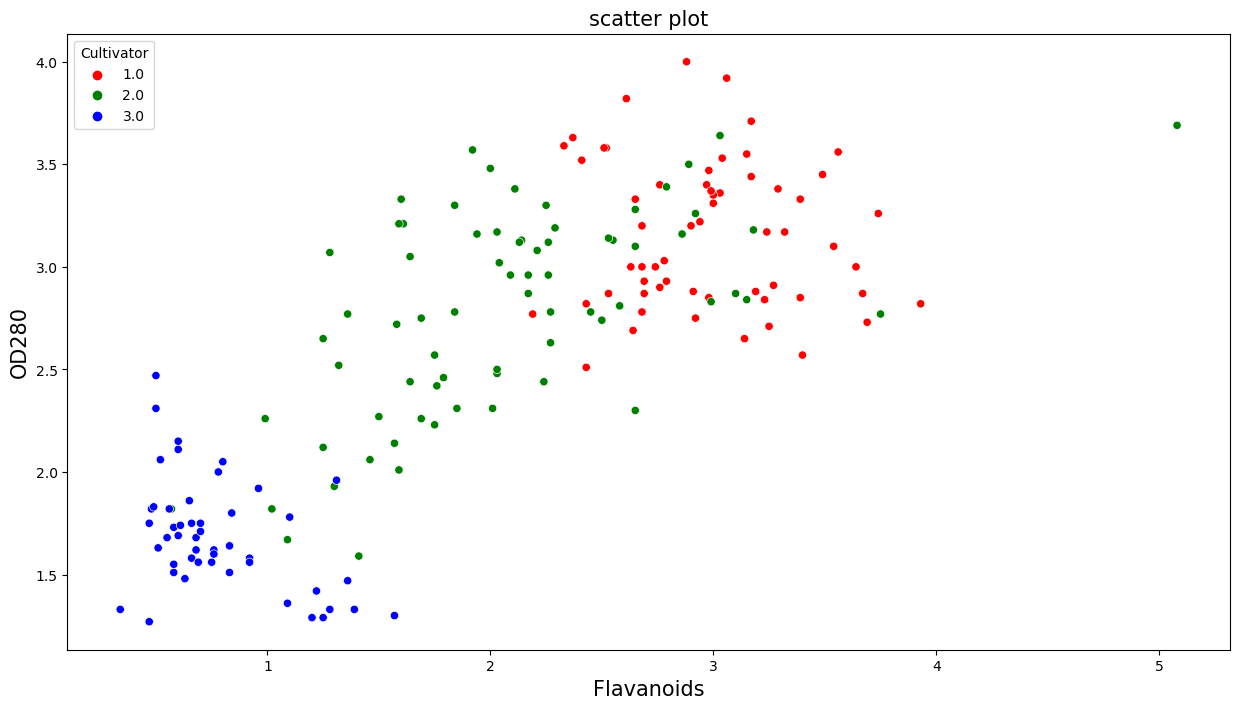

In [20]:
# plot the scatterplot to visualize the clusters
plt.rcParams['figure.figsize'] = [15,8]
sns.scatterplot(x = 'Flavanoids', y = 'OD280', data = A, hue = 'Cultivator',palette=['red','green','blue'])

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('scatter plot', fontsize = 15)
plt.xlabel('Flavanoids', fontsize = 15)
plt.ylabel('OD280', fontsize = 15)

# display the plot
plt.show()

In [21]:
A.shape

(178, 14)

In [23]:
!pip install plotly

     ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
     ---------------------------------------- 0.1/15.7 MB 2.3 MB/s eta 0:00:07
     ---------------------------------------- 0.1/15.7 MB 1.7 MB/s eta 0:00:10
      --------------------------------------- 0.4/15.7 MB 3.5 MB/s eta 0:00:05
     - -------------------------------------- 0.7/15.7 MB 3.8 MB/s eta 0:00:04
     - -------------------------------------- 0.7/15.7 MB 3.5 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/15.7 MB 3.4 MB/s eta 0:00:05
     -- ------------------------------------- 1.1/15.7 MB 3.7 MB/s eta 0:00:04
     --- ------------------------------------ 1.3/15.7 MB 3.9 MB/s eta 0:00:04
     --- ------------------------------------ 1.4/15.7 MB 3.5 MB/s eta 0:00:05
     ---- ----------------------------------- 1.7/15.7 MB 3.7 MB/s eta 0:00:04
     ---- ----------------------------------- 1.9/15.7 MB 3.8 MB/s eta 0:00:04
     ---- ----------------------------------- 1.9/15.7 MB 3

In [24]:
#3D plot using Plotly
import plotly.express as px
fig = px.scatter_3d(A, x='Flavanoids', y='OD280', z='Alchol',color=A['Cultivator'])
fig.show()

In [25]:
A['Cultivator'].value_counts()

2.0    71
1.0    59
3.0    48
Name: Cultivator, dtype: int64

In [26]:
A.corr()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
Cultivator,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alchol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_Ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [27]:
from scipy.stats import f_oneway

In [28]:
g1=A[A['Cultivator']==1]
g2=A[A['Cultivator']==2]
g3=A[A['Cultivator']==3]

In [29]:
g1.shape,g2.shape,g3.shape

((59, 14), (71, 14), (48, 14))

In [30]:
A['Cultivator'].value_counts()

2.0    71
1.0    59
3.0    48
Name: Cultivator, dtype: int64

In [31]:
f_oneway(g1['Ash'],g2['Ash'],g3['Ash'])

F_onewayResult(statistic=13.312901199991039, pvalue=4.149967974793239e-06)

In [32]:
f_oneway(g1['Magnesium'],g2['Magnesium'],g3['Magnesium'])


F_onewayResult(statistic=12.4295843381499, pvalue=8.963395439251042e-06)

In [33]:
X=A.drop('Cultivator',axis=1)
Y=A['Cultivator']

In [34]:
p_val=[]
for col in X.columns:
  res=f_oneway(g1[col],g2[col],g3[col])
  p_val.append(res[1])
print(p_val)

[3.319503795619655e-36, 4.127228798041834e-14, 4.149967974793239e-06, 9.444472938826817e-14, 8.963395439251042e-06, 2.1376700154385954e-28, 3.5985858307136404e-50, 3.88804090047893e-11, 5.125358737546706e-12, 1.162008021927618e-33, 5.9176622163620664e-30, 1.393104956942896e-44, 5.783168356105498e-47]


In [35]:
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [36]:
LR=LogisticRegression()
NB=GaussianNB()

In [37]:
from sklearn.model_selection import cross_val_score,KFold

In [38]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(LR,X_std,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.9658192090395481, 0.05920286658639382)

In [39]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(NB,X_std,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.9490931320063195, 0.00031152756735189824)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(knn,params,cv=kf,scoring='f1_weighted')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [42]:
GS.best_params_

{'n_neighbors': 13, 'weights': 'uniform'}

In [43]:
knn_tuned=KNeighborsClassifier(n_neighbors=13,weights='uniform')
score=cross_val_score(knn_tuned,X_std,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.9771099712558232, 0.039646692771626336)

In [44]:
from sklearn.ensemble import BaggingClassifier

In [45]:
knn_be=[]
knn_ve=[]
for i in np.arange(1,100):
  knn_bag=BaggingClassifier(base_estimator=knn_tuned,n_estimators=i,random_state=0)
  kf=KFold(n_splits=3,shuffle=True,random_state=0)
  scores=cross_val_score(knn_bag,X_std,Y,scoring='f1_weighted')
  knn_be.append(np.mean(1-scores))
  knn_ve.append(np.std(scores,ddof=1))

In [46]:
np.argmin(knn_ve),np.min(knn_ve),1-knn_be[1]

(1, 0.02389905868431274, 0.94887375653567)

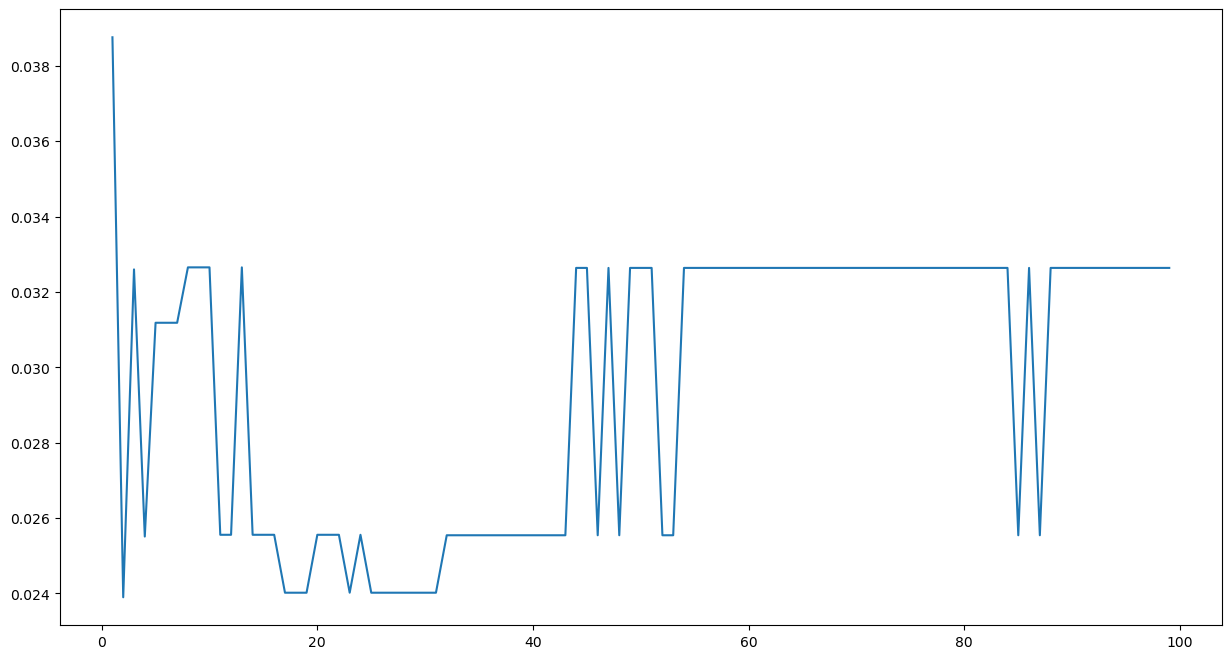

In [47]:
x_axis=np.arange(1,100)
plt.plot(x_axis,knn_ve)

In [48]:
from sklearn import metrics

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [64]:
DT_be=[]
DT_ve=[]
for i in np.arange(1,10):
  DT=DecisionTreeClassifier(max_depth=i,random_state=0)
  kf=KFold(n_splits=3,shuffle=True,random_state=0)
  scores=cross_val_score(DT,X,Y,scoring='f1_weighted')
  DT_be.append(np.mean(1-scores))
  DT_ve.append(np.std(scores,ddof=1))

In [65]:
np.argmin(DT_ve),np.min(DT_ve)

(3, 0.04505939965705464)

In [66]:
DT_tuned=DecisionTreeClassifier(max_depth=4,random_state=0)

In [106]:
RF_be=[]
RF_ve=[]
feature_importances = [] 
for i in np.arange(1,100):
  RF=RandomForestClassifier(criterion='gini',n_estimators=i,random_state=0)
  kf=KFold(n_splits=3,shuffle=True,random_state=0)
  scores=cross_val_score(RF,X_std,Y,scoring='f1_weighted')
  RF_be.append(np.mean(1-scores))
  RF_ve.append(np.std(scores,ddof=1))
  RF.fit(X_std, Y)
  feature_importances.append(RF.feature_importances_)
feature_importances_df = pd.DataFrame(feature_importances, columns=X.columns)


In [108]:
mean_importance = feature_importances_df.mean()

# Sort features by their mean importance in descending order
sorted_features = mean_importance.sort_values(ascending=False)

# Print or visualize the sorted feature importances
print("Feature Importance (Mean across models):")
print(sorted_features)


Feature Importance (Mean across models):
Proline                 0.193289
Flavanoids              0.182819
Color_intensity         0.150158
Alchol                  0.104506
OD280                   0.101846
Hue                     0.078567
Total_phenols           0.041286
Proanthocyanins         0.040301
Malic_Acid              0.038623
Magnesium               0.026253
Alcalinity_of_Ash       0.022877
Nonflavanoid_phenols    0.011799
Ash                     0.007674
dtype: float64


Proline (0.193289):

Proline is an amino acid found in grapes and plays a significant role in the flavor and structure of wines. Higher proline content is often associated with certain grape varieties and can influence the sensory characteristics of wines.

Flavanoids (0.182819):
Flavanoids are a group of polyphenolic compounds found in grape skins and seeds. They contribute to the color, flavor, and antioxidant properties of wines. Certain flavanoids, such as anthocyanins, are responsible for the red coloration in red wines.

Color Intensity (0.150158):
Color intensity refers to the depth and richness of color in wines, which is influenced by factors such as grape variety, ripeness, and winemaking techniques. Higher color intensity is often associated with red wines and can reflect the presence of anthocyanins and other phenolic compounds.

Alcohol (0.104506):
Alcohol content is a key characteristic of wines and can vary depending on grape variety, fermentation process, and climate conditions. It contributes to the body, texture, and perceived sweetness of wines, with higher alcohol levels typically observed in full-bodied styles.

OD280 (0.101846):
OD280, or optical density at 280 nm, is a measure of protein and phenolic content in wines. It can provide insights into the overall phenolic maturity and aging potential of wines, as well as their stability and clarity.

Hue (0.078567):
Hue refers to the color tone or tint of wines, which can range from ruby red to golden yellow. It is influenced by factors such as grape variety, ripeness, and winemaking techniques. Hue can provide clues about the grape's phenolic composition and the wine's age and style.

Total Phenols (0.041286):
Total phenols encompass a broad class of compounds found in grape skins, seeds, and stems. They contribute to the flavor, color, and antioxidant properties of wines, with higher phenolic content associated with red wines and potential health benefits.

Proanthocyanins (0.040301):
Proanthocyanins are a type of flavanoid compound found in grape skins and seeds. They contribute to the bitterness, astringency, and mouthfeel of wines, with higher proanthocyanin levels often observed in red wines and wines aged in oak barrels.

Malic Acid (0.038623):
Malic acid is a primary organic acid found in grapes and plays a role in acidity and flavor balance in wines. It can contribute to the crispness, tartness, and green apple flavors in wines, with levels varying depending on grape ripeness and climate conditions.

Magnesium (0.026253):
Magnesium is a mineral element found in grapevine soils and can influence vine growth, fruit development, and grape composition. While its direct impact on wine flavor and quality may be less pronounced, adequate magnesium levels are essential for vine health and grapevine metabolism.

Alcalinity of Ash (0.022877):
Alcalinity of ash refers to the pH and mineral content of grape ash residues and can indirectly reflect soil composition and vineyard terroir. While its direct impact on wine flavor may be minimal, soil pH and nutrient levels can affect grapevine health and fruit quality.

Nonflavanoid Phenols (0.011799):
Nonflavanoid phenols encompass a diverse group of polyphenolic compounds found in grape skins, seeds, and stems. They contribute to wine color stability, antioxidant activity, and sensory complexity, with specific compounds such as resveratrol attracting attention for their potential health benefits.

Ash (0.007674):
Ash content refers to the mineral residue left after grape combustion and can provide insights into grape mineral uptake and vineyard terroir. While its direct impact on wine flavor may be limited, ash content can indirectly influence grapevine health and fruit composition.

In [109]:
np.argmin(RF_ve),np.min(RF_ve)

(60, 0.012680068860603404)

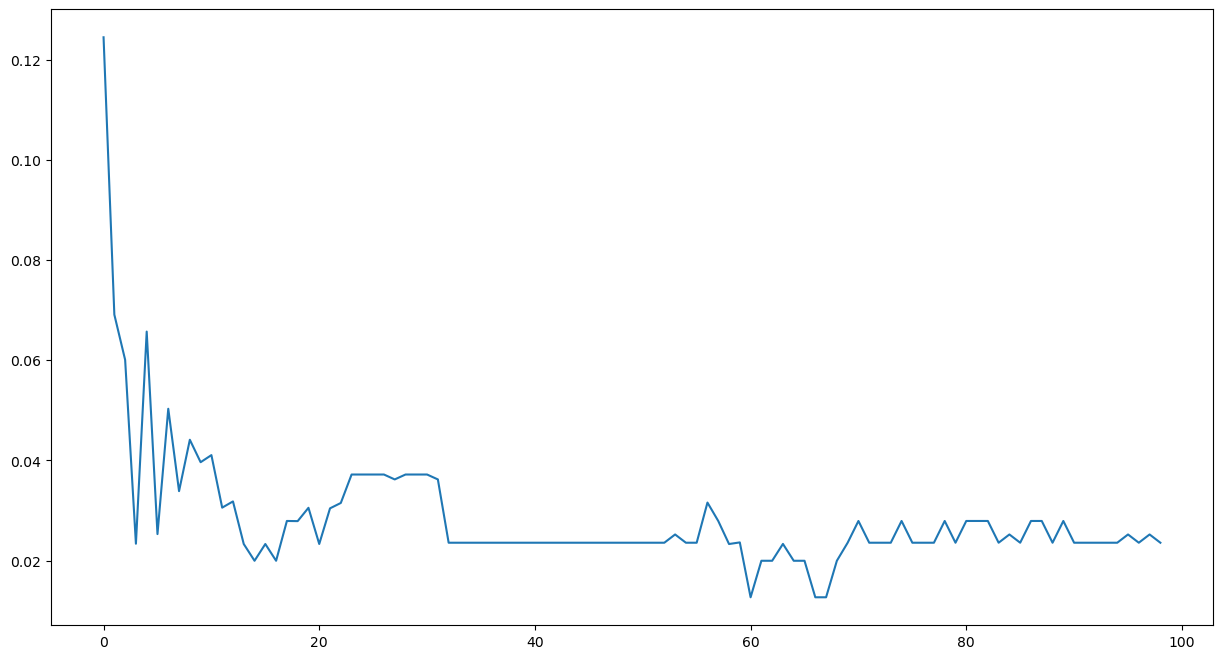

In [69]:
X_axis=np.arange(len(RF_ve))
plt.plot(X_axis,RF_ve)

In [70]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(DT_tuned,X,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.903885356789333, 0.043995981697500755)

In [71]:
RF_tuned=RandomForestClassifier(criterion='gini',n_estimators=61,random_state=0)

In [72]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(RF_tuned,X_std,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.9661015286438567, 0.03404757699686401)

In [73]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [74]:
Ab=AdaBoostClassifier(random_state=0)
params={'n_estimators':np.arange(1,100)}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(Ab,params,cv=kf,scoring='f1_weighted')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(random_state=0),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [75]:
GS.best_params_

{'n_estimators': 10}

In [76]:
Ab_dt=AdaBoostClassifier(n_estimators=10,random_state=0)

In [77]:
score=cross_val_score(Ab_dt,X_std,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.9154622200289232, 0.01791679972273291)

In [78]:
#Let us boost the LR model
Ab=AdaBoostClassifier(base_estimator=LR,random_state=0)
params={'n_estimators':np.arange(1,100)}
kf=KFold(n_splits=3,shuffle=True,random_state=3)
GS=GridSearchCV(Ab,params,cv=kf,scoring='f1_weighted')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=3, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=LogisticRegression(),
                                          random_state=0),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [79]:
GS.best_params_

{'n_estimators': 7}

In [80]:
#Let us boost the NB model
Ab=AdaBoostClassifier(base_estimator=NB,random_state=0)
params={'n_estimators':np.arange(1,100)}
kf=KFold(n_splits=3,shuffle=True,random_state=3)
GS=GridSearchCV(Ab,params,cv=kf,scoring='f1_weighted')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=3, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=GaussianNB(),
                                          random_state=0),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [81]:
GS.best_params_

{'n_estimators': 98}

* n_estimator=1 indicates there is no scope for boosting

In [82]:
Ab_NB=AdaBoostClassifier(base_estimator=NB,n_estimators=92,random_state=0)

In [83]:
Ab_LR=AdaBoostClassifier(base_estimator=LR,n_estimators=7,random_state=0)

In [84]:
score=cross_val_score(Ab_dt,X,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.9042513710091621, 0.026087451182164476)

In [85]:
score=cross_val_score(Ab_LR,X,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.9443081826398236, 0.034443600924225784)

In [86]:
#Let us boost the RF model
Ab=AdaBoostClassifier(base_estimator=RF_tuned,random_state=0)
params={'n_estimators':np.arange(1,50)}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(Ab,params,cv=kf,scoring='f1_weighted')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=61,
                                                                                random_state=0),
                                          random_state=0),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='f1_weighted')

In [87]:
GS.best_params_

{'n_estimators': 1}

no scope for boosting Rf

In [88]:
GB=GradientBoostingClassifier(random_state=0)
params={'n_estimators':np.arange(1,100)}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(GB,params,cv=kf,scoring='f1_weighted')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [89]:
GS.best_params_

{'n_estimators': 14}

In [90]:
GB_tuned=GradientBoostingClassifier(n_estimators=14,random_state=0)

In [91]:
from sklearn.ensemble import VotingClassifier
Stacked = VotingClassifier(estimators = [('BoostedLR',Ab_LR),
                                         ('RandomForest', RF_tuned), 
                                         ('GBoost',GB_tuned)],voting='soft')

In [92]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [93]:
XGB=XGBClassifier(gamma=2, learning_rate=0.1,max_depth=2,n_estimators=100)

In [94]:
base_learners = [('Boosted_LR', Ab_LR),('Random Forest', RF_tuned)]
stack_model = StackingClassifier(estimators = base_learners,final_estimator=GB_tuned)

In [95]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',knn_tuned))
models.append(('DecisionTree',DT_tuned))
models.append(('RandomForest',RF_tuned))
models.append(('BoostedDT',Ab_dt))
models.append(('BoostedLR',Ab_LR))
models.append(('BoostedNB',Ab_NB))
models.append(('GBoost',GB_tuned))
models.append(('VotingC',Stacked))
models.append(('StackingC',stack_model))
models.append(('XGBoost',XGB))

In [98]:
Y.nunique

<bound method IndexOpsMixin.nunique of 1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
      ... 
174    3.0
175    3.0
176    3.0
177    3.0
178    3.0
Name: Cultivator, Length: 178, dtype: float64>

In [99]:
Y = Y.astype(int)



In [104]:
Y_adjusted = Y - 1


Logistic: 0.965819 (0.059203)
NaiveBayes: 0.949093 (0.000312)
KNN: 0.977110 (0.039647)
DecisionTree: 0.903885 (0.043996)
RandomForest: 0.966102 (0.034048)
BoostedDT: 0.915462 (0.017917)
BoostedLR: 0.977268 (0.026103)
BoostedNB: 0.949468 (0.017253)
GBoost: 0.943902 (0.019483)
VotingC: 0.971930 (0.019564)
StackingC: 0.977566 (0.025822)
XGBoost: 0.955007 (0.025903)


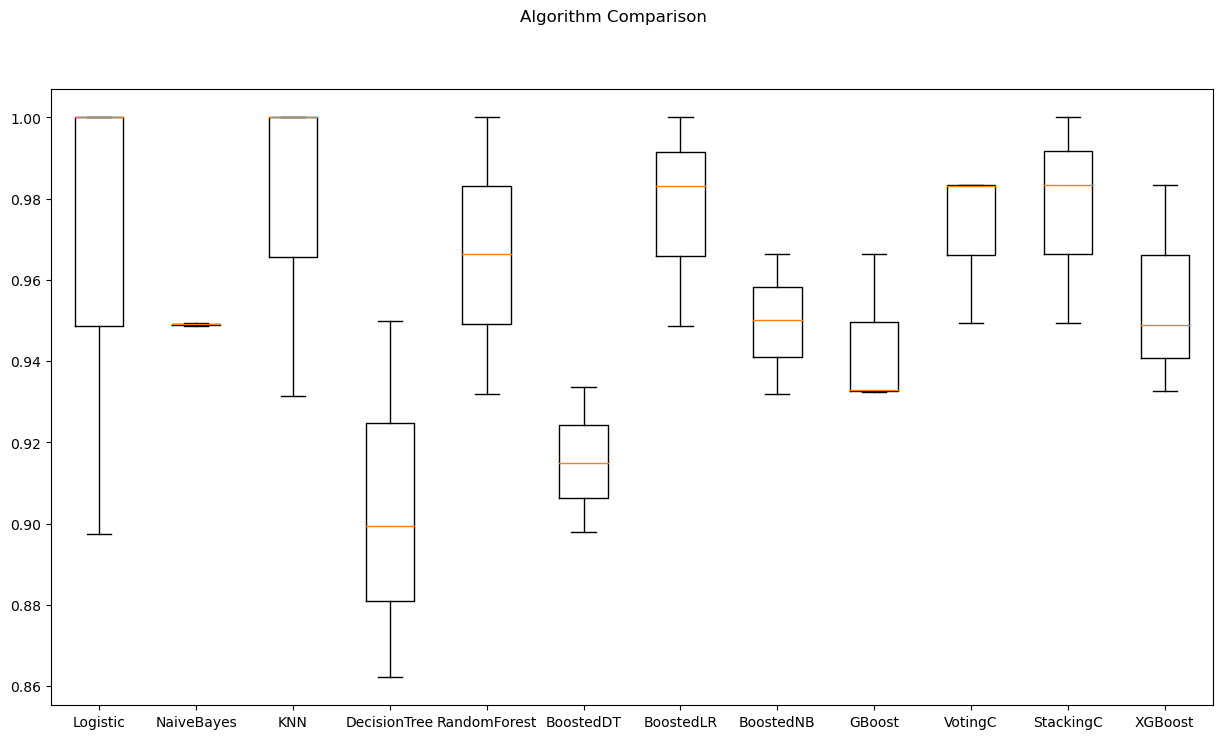

In [105]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = cross_val_score(model, X_std, Y_adjusted,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(cv_results),np.std(cv_results,ddof=1)))
#print(results)
   # boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [15,8]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Understanding the chemical composition and sensory characteristics associated with each feature is crucial for assessing their importance in wine classification and differentiation strategies. let's analyze the chemical composition attributes commonly found in wine datasets after understanding the project


Alcohol (Alchol):

Alcohol content in wine is typically expressed as a percentage by volume (% ABV).
It contributes to the body, texture, and perceived sweetness of the wine.
Different wine styles have varying alcohol levels, with some wines, like fortified wines, having higher alcohol content than others.
Malic Acid (Malic_Acid):

Malic acid is one of the primary organic acids found in grapes and wine.
It contributes to the tartness, acidity, and flavor profile of the wine.
The presence of malic acid is more common in cooler climate grapes and can affect the overall balance and structure of the wine.
Ash (Ash):

Ash content in wine refers to the inorganic mineral residue left after complete combustion of organic matter.
It includes minerals such as potassium, calcium, magnesium, and phosphorus derived from grape skins, seeds, and stems.
Ash content may influence wine stability, pH levels, and sensory characteristics.
Alcalinity of Ash (Alcalinity_of_Ash):

Alkalinity of ash measures the alkaline reserve in wine, mainly attributed to bicarbonate and carbonate ions.
It affects the wine's pH and buffering capacity, influencing its stability and aging potential.
Alkalinity is essential for maintaining wine balance and preventing excessive acidity or basicity.
Magnesium (Magnesium):

Magnesium is an essential mineral found in grapes and wine, contributing to overall vine health and grape development.
It may influence fermentation kinetics, yeast metabolism, and wine aroma development.
Magnesium levels can vary based on soil composition, vineyard management practices, and grape variety.
Total Phenols (Total_phenols):

Total phenolic content represents the concentration of phenolic compounds in wine, including flavonoids, phenolic acids, and tannins.
Phenols contribute to wine color, flavor, mouthfeel, antioxidant properties, and aging potential.
High total phenolic content is often associated with red wines and is influenced by grape ripeness, winemaking techniques, and oak aging.
Flavanoids (Flavanoids):

Flavonoids are a subgroup of phenolic compounds responsible for color, bitterness, and astringency in wine.
They contribute to wine complexity, stability, and health benefits.
Flavonoid subclasses include flavanols, flavonols, flavanones, anthocyanins, and proanthocyanidins.
Nonflavanoid Phenols (Nonflavanoid_phenols):

Nonflavanoid phenols represent phenolic compounds other than flavonoids, such as phenolic acids (e.g., hydroxycinnamic acids, hydroxybenzoic acids).
They contribute to wine antioxidant capacity, sensory characteristics, and overall phenolic profile.
Proanthocyanins (Proanthocyanins):

Proanthocyanins are a type of flavonoid found in grape skins, seeds, and stems.
They contribute to wine color stability, mouthfeel, and aging potential by forming complexes with anthocyanins and tannins.
Proanthocyanin levels vary based on grape variety, ripeness, and winemaking techniques.
Color Intensity (Color_intensity):

Color intensity measures the depth and concentration of color in red wines, primarily influenced by anthocyanin pigments extracted from grape skins during maceration.
It affects wine appearance, hue, and visual perception of quality and age.
Hue (Hue):

Hue represents the shade or tint of wine color, often described on a scale from yellow-green to red-purple.
It reflects the balance between red and yellow pigments in red wines and can indicate wine age, grape variety, and winemaking style.
OD280 (OD280):

OD280 refers to the optical density at 280 nm wavelength, typically measured using spectrophotometry.
It provides information about wine protein content, color stability, and clarification.
OD280 values may vary based on proteinaceous compounds, yeast autolysis, and wine filtration.
Proline (Proline):

Proline is an amino acid found in grapes, wine, and yeast.
It contributes to wine fermentation, nitrogen metabolism, and flavor development.
Proline levels may reflect grape ripeness, vineyard conditions, and nitrogen availability during grape maturation.


From a business perspective, the outcomes of evaluating these classification models on the Wine recognition dataset provide valuable insights into their performance and potential impact on decision-making processes in the wine industry:

Model Performance Assessment:

By evaluating various classification models, we gain an understanding of their effectiveness in accurately classifying wine cultivars based on chemical properties.
This assessment helps businesses identify which models are most suitable for deployment in real-world scenarios, considering factors such as accuracy, consistency, and interpretability.

Risk Mitigation and Quality Control:

High-performing models, such as those with high weighted F1 scores and low standard deviations, offer reliable tools for quality control and risk mitigation in wine production.
Accurate classification of wine cultivars can help identify and address quality issues, ensuring that only high-quality products reach consumers and minimizing the risk of producing subpar wines.

Product Differentiation and Marketing Strategies:

Understanding the chemical composition of wines and accurately classifying them into distinct cultivars enables businesses to differentiate their products based on unique characteristics.
Marketing teams can leverage this information to develop targeted marketing strategies that highlight the unique attributes of each wine cultivar, appealing to different consumer preferences and segments.

Inventory Management and Supply Chain Optimization:

Accurate classification models facilitate effective inventory management by providing insights into the composition and distribution of wine cultivars within the supply chain.
Businesses can optimize production, distribution, and storage processes based on predicted demand for different wine varieties, minimizing inventory holding costs and ensuring sufficient stock availability.

Customer Satisfaction and Loyalty:

Consistently delivering high-quality wines that meet or exceed customer expectations contributes to customer satisfaction and loyalty.
Reliable classification models help ensure product consistency and quality, enhancing the overall customer experience and fostering long-term relationships with consumers.

Operational Efficiency and Cost Reduction:

Automation of classification tasks using machine learning models improves operational efficiency by reducing manual effort and human error.
By streamlining processes and optimizing resource allocation, businesses can achieve cost savings and maximize operational efficiency throughout the wine production lifecycle.

Continuous Improvement and Innovation:

Ongoing evaluation and refinement of classification models enable businesses to adapt to evolving market trends and consumer preferences.
By leveraging data-driven insights and feedback from model performance, businesses can drive continuous improvement initiatives and innovate new products and services to meet changing customer demands.